In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
from pygimli.physics import ert
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Setup package path for development
try:
    # For regular Python scripts
    current_dir = os.path.dirname(os.path.abspath(__file__))
except NameError:
    # For Jupyter notebooks
    current_dir = os.getcwd()

# Add the parent directory to Python path
parent_dir = os.path.dirname(current_dir)
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Import PyHydroGeophysX modules
from PyHydroGeophysX.inversion.time_lapse import TimeLapseERTInversion
from PyHydroGeophysX.inversion.windowed import WindowedTimeLapseERTInversion

In [2]:
data_dir = "results/TL_measurements/appres"

# List of ERT data files testing monthly time-lapse inversion
ert_files = [
    "synthetic_data30.dat",
    "synthetic_data60.dat",
    "synthetic_data90.dat",
    "synthetic_data120.dat",
    "synthetic_data150.dat",
    "synthetic_data180.dat",
    "synthetic_data210.dat",
    "synthetic_data240.dat",
    "synthetic_data270.dat",
    "synthetic_data300.dat",
    "synthetic_data330.dat",
    "synthetic_data360.dat",
]




## 1.Full Time-Lapse Inversion

In [3]:
##################### FUll Time-Lapse Inversion #####################

# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")

01/06/25 - 23:23:19 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:23:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:23:19 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:23:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:23:19 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:23:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:23:19 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:23:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:23:19 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:23:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:23:19 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:23:19 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:23:19 - pyGIMLi - IN

Starting time-lapse inversion...


01/06/25 - 23:23:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:23:20 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:23:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:23:20 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:23:20 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:23:20 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:23:20 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:23:20 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 23:23:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:23:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:23:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 23:23:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:23:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:23:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 23:23:45 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:23:45 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:23:45 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 23:23:53 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:23:53 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward tas

ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 23302920.932678957, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 53.179097693210586
dPhi: 0.9773252668107046
ERTphi_d: 528387.5146797404, ERTphi_m: 8240.712068956878, ERTphi_t: 7028.722599425699
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 23.01229832981425
dPhi: 0.5672679806909878
ERTphi_d: 228650.1962050344, ERTphi_m: 4211.670558988954, ERTphi_t: 6879.951552866598
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 9.998014740230985
dPhi: 0.5655360191781553
ERTphi_d: 99340.27445893506, ERTphi_m: 2953.800621909213, ERTphi_t: 6919.27938255587
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3823228886255723
dPhi: 0.8617402629880864
ERTphi_d: 13734.760221383687, ERTphi_m: 3133.6503281808473, ERTphi_t: 6874.503064107089
Convergence reached at iteration 4
End of inversion
Inversion complete!


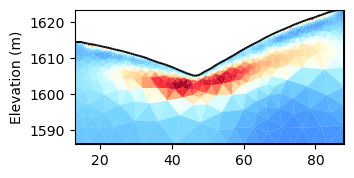

<Figure size 640x480 with 0 Axes>

In [4]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()

## 2. Window time-lapse inversion

In [5]:
# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(os.path.join(data_dir, ert_files[0]))
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L2"           # 'L1', 'L2', or 'L1L2'
}

# Define the window size (number of timesteps to process together)
window_size = 3  # A window size of 3 means each window includes 3 consecutive measurements

# Create the windowed time-lapse inversion object
inversion = WindowedTimeLapseERTInversion(
    data_dir=data_dir,               # Directory containing ERT data files
    ert_files=ert_files,             # List of ERT data filenames
    measurement_times=measurement_times,  # List of measurement times
    window_size=window_size,         # Size of sliding window
    mesh=mesh,                       # Mesh for inversion
    **inversion_params               # Pass the same inversion parameters
)

# Run the inversion, optionally in parallel
print("Starting windowed time-lapse inversion...")
result = inversion.run()
print("Inversion complete!")


01/06/25 - 23:49:28 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:49:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.


Starting windowed time-lapse inversion...

Processing 10 windows sequentially...
Using L2 inversion

Starting L2 inversion for window 0


01/06/25 - 23:49:29 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:49:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:49:29 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:49:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:49:29 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:49:29 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:49:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:49:29 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:49:29 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 23:49:38 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:49:38 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:49:38 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 23:49:46 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:49:46 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:49:46 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2614.857697445681
dPhi: 1.0
ERTphi_d: 6495306.520455072, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 57.16308932012234
dPhi: 0.97813912039039
ERTphi_d: 141993.1138711839, ERTphi_m: 2133.0975658532457, ERTphi_t: 2019.3806087354471
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 22.557638071650825
dPhi: 0.6053810537543818
ERTphi_d: 56033.172969980646, ERTphi_m: 1094.5737158672541, ERTphi_t: 1990.4008595340567
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.932758487624591
dPhi: 0.5153411694567318
ERTphi_d: 27156.972083259483, ERTphi_m: 777.9864700090368, ERTphi_t: 2016.183349829259
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.4114265448507315
dPhi: 0.8708993209309064
ERTphi_d: 3505.983537409217, ERTphi_m: 824.8501255471302, ERTphi_t: 2007.1662754065624
Convergence reached at iteration 4
End of inversion

Window 0 results:
Model shape: 

01/06/25 - 23:51:15 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:51:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:51:15 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:51:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:51:15 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:51:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:51:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:51:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:51:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 23:51:23 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:51:23 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:51:23 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 23:51:30 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:51:30 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:51:30 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2424.799586453877
dPhi: 1.0
ERTphi_d: 6023202.17275143, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 49.16041659148559
dPhi: 0.9797259877203379
ERTphi_d: 122114.47481325021, ERTphi_m: 2030.306140158605, ERTphi_t: 201.66353956223554
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 24.908470751148858
dPhi: 0.4933226266544105
ERTphi_d: 61872.641345853765, ERTphi_m: 1047.2803061070456, ERTphi_t: 196.0707199375729
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.835527382463711
dPhi: 0.5649862454135631
ERTphi_d: 26915.450018039857, ERTphi_m: 683.3607770173419, ERTphi_t: 185.1927829261712
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.2212975361487903
dPhi: 0.8872876701760408
ERTphi_d: 3033.703079793595, ERTphi_m: 749.3135685983998, ERTphi_t: 185.187432526703
Convergence reached at iteration 4
End of inversion

Window 1 results:
Model shape: (1

01/06/25 - 23:53:01 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:53:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:53:01 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:53:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:53:01 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:53:01 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:53:01 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:53:01 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:53:01 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 23:53:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:53:09 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:53:09 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 23:53:16 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:53:16 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:53:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2361.2976889094757
dPhi: 1.0
ERTphi_d: 5865463.459251137, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 46.75653285803884
dPhi: 0.9801987978569391
ERTphi_d: 116143.22761936847, ERTphi_m: 2035.601826020254, ERTphi_t: 271.59864120859646
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 25.442418671796556
dPhi: 0.45585317993863506
ERTphi_d: 63198.967980742644, ERTphi_m: 1048.313419016155, ERTphi_t: 268.2818204901232
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.645684568574818
dPhi: 0.5815773372059246
ERTphi_d: 26443.88046833985, ERTphi_m: 704.7308890169467, ERTphi_t: 261.15539741669636
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3260170507320597
dPhi: 0.8754408847838352
ERTphi_d: 3293.826354018436, ERTphi_m: 767.1448961762502, ERTphi_t: 258.77330543926416
Convergence reached at iteration 4
End of inversion

Window 2 results:
Model shape

01/06/25 - 23:54:47 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:54:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:54:47 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:54:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:54:47 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:54:47 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:54:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:54:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:54:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 23:54:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:54:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:54:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 23:55:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:55:04 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:55:04 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2335.406380855519
dPhi: 1.0
ERTphi_d: 5801149.450045109, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 46.562103437386014
dPhi: 0.9800625262399388
ERTphi_d: 115660.26493846686, ERTphi_m: 2016.0786679488435, ERTphi_t: 246.02312891102062
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 25.85195337234722
dPhi: 0.4447855345042259
ERTphi_d: 64216.2521769105, ERTphi_m: 1001.7186332291873, ERTphi_t: 247.25962855561454
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.7354840418752
dPhi: 0.5847321907458448
ERTphi_d: 26666.942360017994, ERTphi_m: 672.1040102378436, ERTphi_t: 239.36915215353787
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3377570611894785
dPhi: 0.8753892180388535
ERTphi_d: 3322.9885399946647, ERTphi_m: 720.2487255136627, ERTphi_t: 238.76704472829633
Convergence reached at iteration 4
End of inversion

Window 3 results:
Model shape:

01/06/25 - 23:56:31 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:56:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:56:31 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:56:31 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:56:32 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:56:32 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:56:32 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:56:32 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:56:32 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 23:56:39 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:56:39 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:56:39 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 23:56:47 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:56:47 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:56:47 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2119.5610754349227
dPhi: 1.0
ERTphi_d: 5264989.711380348, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 43.196988011927616
dPhi: 0.9796198427530266
ERTphi_d: 107301.3182216282, ERTphi_m: 2036.179876918066, ERTphi_t: 1915.3260811604514
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 24.876806453286914
dPhi: 0.4241078464448055
ERTphi_d: 61793.987229964696, ERTphi_m: 1012.8916753078938, ERTphi_t: 1886.941152840147
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 9.432169475419128
dPhi: 0.6208448422376628
ERTphi_d: 23429.508976941113, ERTphi_m: 734.970338596857, ERTphi_t: 1888.5038290167558
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.505537661238075
dPhi: 0.8403826749337352
ERTphi_d: 3739.7555505153787, ERTphi_m: 768.7412648878172, ERTphi_t: 1875.517057285989
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.16362511

01/06/25 - 23:58:33 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:58:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:58:33 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:58:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:58:33 - pyGIMLi - INFO - Found 2 regions.
01/06/25 - 23:58:33 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
01/06/25 - 23:58:33 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:58:33 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:58:33 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


01/06/25 - 23:58:41 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:58:41 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:58:41 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
01/06/25 - 23:58:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
01/06/25 - 23:58:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
01/06/25 - 23:58:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1950.723115414603
dPhi: 1.0
ERTphi_d: 4845596.218689874, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 41.531795771098096
dPhi: 0.9787095383025329
ERTphi_d: 103164.98069540766, ERTphi_m: 2021.1630545844496, ERTphi_t: 1928.3634516276238
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 23.366008843909228
dPhi: 0.4373946897771853
ERTphi_d: 58041.16596827052, ERTphi_m: 1051.9619415614106, ERTphi_t: 1907.4359410451202
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 8.185513723420122
dPhi: 0.6496828457910208
ERTphi_d: 20332.81608897558, ERTphi_m: 756.3258628438062, ERTphi_t: 1917.9922762307701
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.4234967138092214
dPhi: 0.8260956169755895
ERTphi_d: 3535.965837102106, ERTphi_m: 788.404294127233, ERTphi_t: 1902.32134794152
Convergence reached at iteration 4
End of inversion

Window 5 results:
Model shape: (

02/06/25 - 00:00:17 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:00:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:00:17 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:00:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:00:17 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:00:17 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:00:17 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:00:17 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:00:17 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 00:00:26 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:00:26 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:00:26 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
02/06/25 - 00:00:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:00:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:00:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 1883.650824187547
dPhi: 1.0
ERTphi_d: 4678988.6472818665, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 44.8434173803205
dPhi: 0.9761933492107475
ERTphi_d: 111391.04877271612, ERTphi_m: 1953.110450876419, ERTphi_t: 1358.122826005204
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 22.4951193862208
dPhi: 0.49836295491403015
ERTphi_d: 55877.876555372466, ERTphi_m: 1037.7297925594407, ERTphi_t: 1330.4517828530186
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 7.983766674450585
dPhi: 0.6450889396327909
ERTphi_d: 19831.676419335254, ERTphi_m: 725.5828801815278, ERTphi_t: 1345.2560736283067
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.367755332735288
dPhi: 0.8286829527330328
ERTphi_d: 3397.5042465144556, ERTphi_m: 765.657382725194, ERTphi_t: 1334.4165464521564
Convergence reached at iteration 4
End of inversion

Window 6 results:
Model shape: (

02/06/25 - 00:02:15 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:02:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:02:15 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:02:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:02:15 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:02:15 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:02:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:02:15 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:02:15 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 00:02:25 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:02:25 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:02:25 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
02/06/25 - 00:02:35 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:02:35 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:02:35 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2080.9823041318746
dPhi: 1.0
ERTphi_d: 5169160.043463577, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 53.03294100791074
dPhi: 0.9745154291304584
ERTphi_d: 131733.82546365028, ERTphi_m: 1898.0064287732887, ERTphi_t: 1438.1313617795086
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 20.8887887349668
dPhi: 0.606116720325752
ERTphi_d: 51887.751217657526, ERTphi_m: 999.1980898765676, ERTphi_t: 1402.6890770190037
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 8.496886042204212
dPhi: 0.5932322285408131
ERTphi_d: 21106.264928835262, ERTphi_m: 668.8058444798357, ERTphi_t: 1397.4916035227852
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3290508655612963
dPhi: 0.8435837718712629
ERTphi_d: 3301.36235005426, ERTphi_m: 719.3939433888763, ERTphi_t: 1387.9193514369583
Convergence reached at iteration 4
End of inversion

Window 7 results:
Model shape: (

02/06/25 - 00:04:02 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:04:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:04:02 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:04:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:04:02 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:04:02 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:04:02 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:04:02 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:04:03 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 00:04:10 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:04:11 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:04:11 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
02/06/25 - 00:04:18 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:04:18 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:04:18 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2339.9500473783282
dPhi: 1.0
ERTphi_d: 5812435.917687767, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 60.965365827584144
dPhi: 0.9739458686753208
ERTphi_d: 151437.968715719, ERTphi_m: 1919.049187899248, ERTphi_t: 690.3708732244852
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 21.21909948737282
dPhi: 0.6519482955719079
ERTphi_d: 52708.24312663409, ERTphi_m: 944.7882647052043, ERTphi_t: 672.2469066720646
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 9.890176107175733
dPhi: 0.533902175581898
ERTphi_d: 24567.19745022452, ERTphi_m: 613.2870046108497, ERTphi_t: 676.544919952511
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.2898757085111545
dPhi: 0.8695801071150496
ERTphi_d: 3204.051259941708, ERTphi_m: 661.40449887187, ERTphi_t: 671.9410522681527
Convergence reached at iteration 4
End of inversion

Window 8 results:
Model shape: (1364, 3)


02/06/25 - 00:05:40 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:05:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:05:40 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:05:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:05:40 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:05:40 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:05:40 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:05:40 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:05:40 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 00:05:48 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:05:48 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:05:48 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
02/06/25 - 00:05:56 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:05:56 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:05:56 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


ERT chi2: 2547.2932024544716
dPhi: 1.0
ERTphi_d: 6327476.314896908, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 62.80862237717589
dPhi: 0.9753429945494079
ERTphi_d: 156016.6179849049, ERTphi_m: 2154.6757144742255, ERTphi_t: 930.5172726938457
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 21.75362831850618
dPhi: 0.6536521978165332
ERTphi_d: 54036.012743169355, ERTphi_m: 1116.1756105952895, ERTphi_t: 909.6596110809355
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 10.4791023968808
dPhi: 0.5182825483891325
ERTphi_d: 26030.090353851905, ERTphi_m: 804.2103574791453, ERTphi_t: 909.218361586079
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 1.3134715483948363
dPhi: 0.8746580099469393
ERTphi_d: 3262.6633262127734, ERTphi_m: 854.9217809986897, ERTphi_t: 905.368138495345
Convergence reached at iteration 4
End of inversion

Window 9 results:
Model shape: (136

In [6]:
result.final_models = np.array(result.final_models)
result.final_models.shape

(1364, 12)

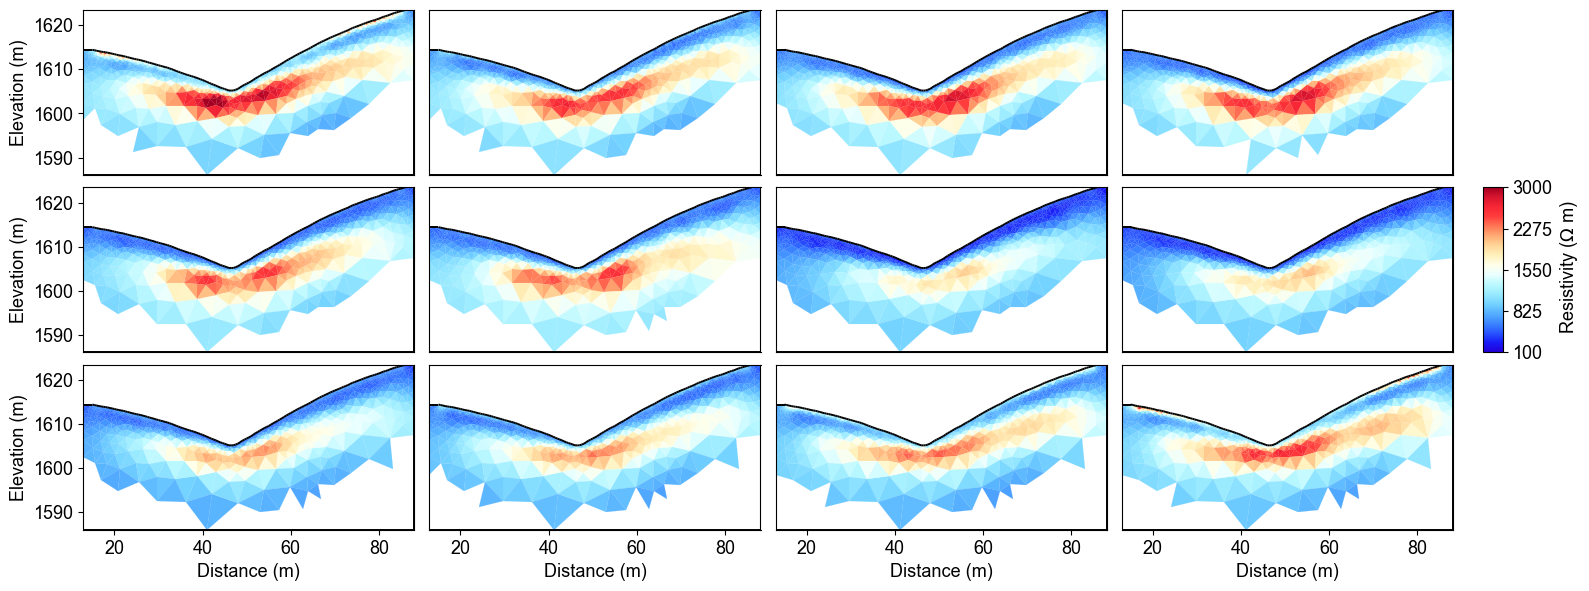

In [7]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pylab as pylab
params = {'legend.fontsize': 13,
          #'figure.figsize': (15, 5),
         'axes.labelsize': 13,
         'axes.titlesize':13,
         'xtick.labelsize':13,
         'ytick.labelsize':13}

pylab.rcParams.update(params)
plt.rcParams["font.family"] = "Arial"

fixed_cmap = BlueDarkRed18_18.mpl_colormap
fig = plt.figure(figsize=[16, 6])

# Use tight_layout with adjusted parameters to reduce space
plt.subplots_adjust(wspace=0.05, hspace=0.05)

# True resistivity model
for i in range(12):
    row, col = i // 4, i % 4
    ax = fig.add_subplot(3, 4, i+1)
    
    # Add common ylabel only to leftmost panels
    ylabel = "Elevation (m)" if col == 0 else None
    
    # Add resistivity label only to the middle-right panel (row 1, col 3)
    resistivity_label = ' Resistivity ($\Omega$ m)' if (i == 7) else None
    
    # Only show axis ticks on leftmost and bottom panels
    if col != 0:
        ax.set_yticks([])
    
    if row != 2:  # Not bottom row
        ax.set_xticks([])
    else:
        # Add "distance (m)" label to bottom row panels
        ax.set_xlabel("Distance (m)")
    
    # Create the plot
    ax, cbar = pg.show(result.mesh,
                      result.final_models[:,i],
                      pad=0.3,
                      orientation="vertical",
                      cMap=fixed_cmap,
                      cMin=100,
                      cMax=3000,
                      ylabel=ylabel,
                      label=resistivity_label,
                      ax=ax,
                      logScale=False,
                      coverage=result.all_coverage[i]>-1.2)
    
    # Only keep colorbar for the middle-right panel (row 1, col 3)
    # This corresponds to panel index 7 in a 0-based indexing system
    if i != 7:  # Keep only the colorbar for panel 7
        cbar.remove()

plt.tight_layout()
plt.savefig("results/TL_measurements/timelapse_ert.tiff", dpi=300, bbox_inches='tight')

## 3. Full L1 Time-lapse Inversion

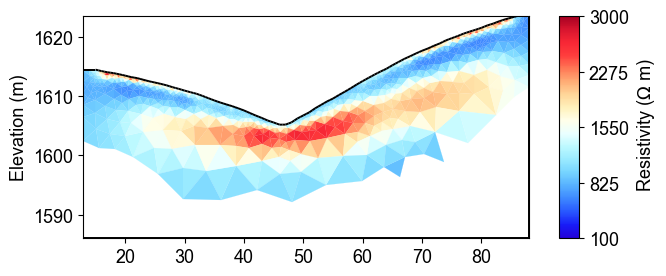

In [8]:
ax, cbar = pg.show(result.mesh,result.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',logScale=False,coverage=result.all_coverage[i]>-1)

In [9]:
# Full paths to data files
data_files = [os.path.join(data_dir, f) for f in ert_files]

# Measurement times (can be timestamps or any sequential numbers representing time)
measurement_times = [1, 2, 3, 4, 5, 6, 7 ,8, 9, 10, 11, 12]  # Adjust based on your actual acquisition times

# Create a mesh for the inversion (or load an existing one)
data = ert.load(data_files[0])
ert_manager = ert.ERTManager(data)
mesh = ert_manager.createMesh(data=data, quality=34)

# Set up inversion parameters
inversion_params = {
    "lambda_val": 10.0,              # Regularization parameter
    "alpha": 10.0,                   # Temporal regularization parameter
    "decay_rate": 0.0,               # Temporal decay rate
    "method": "cgls",                # Solver method ('cgls', 'lsqr', etc.)
    "model_constraints": (0.001, 1e4), # Min/max resistivity values (ohm-m)
    "max_iterations": 15,            # Maximum iterations
    "absoluteUError": 0.0,           # Absolute data error (V)
    "relativeError": 0.05,           # Relative data error (5%)
    "lambda_rate": 1.0,              # Lambda reduction rate
    "lambda_min": 1.0,               # Minimum lambda value
    "inversion_type": "L1"           # 'L1', 'L2', or 'L1L2'
}

# Create the time-lapse inversion object
inversion = TimeLapseERTInversion(
    data_files=data_files,
    measurement_times=measurement_times,
    mesh=mesh,
    **inversion_params
)

# Run the inversion
print("Starting time-lapse inversion...")
result_L1 = inversion.run()
print("Inversion complete!")

02/06/25 - 00:07:27 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:07:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:07:27 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:07:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:07:27 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:07:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:07:27 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:07:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:07:27 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:07:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:07:27 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:07:27 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:07:28 - pyGIMLi - IN

Starting time-lapse inversion...


02/06/25 - 00:07:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:07:28 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:07:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:07:28 - pyGIMLi - INFO - Found 2 regions.
02/06/25 - 00:07:28 - pyGIMLi - INFO - (ERTModelling) Region with smallest marker (1) set to background.
02/06/25 - 00:07:28 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:07:28 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:07:28 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884


-6.907755278982137 9.210340371976184
------------------- IRLS Iteration: 1 ---------------------------
-------------------ERT Iteration: 0 ---------------------------


02/06/25 - 00:07:37 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:07:37 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:07:37 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
02/06/25 - 00:07:44 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:07:44 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:07:44 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
02/06/25 - 00:07:52 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:07:52 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward task.
02/06/25 - 00:07:52 - pyGIMLi - INFO - Mesh for forward task: Mesh: Nodes: 3986 Cells: 7596 Boundaries: 5884
02/06/25 - 00:08:00 - pyGIMLi - INFO - Creating forward mesh from region infos.
02/06/25 - 00:08:00 - pyGIMLi - INFO - Creating refined mesh (H2) to solve forward tas

ERT chi2: 2345.302026235805
dPhi: 1.0
ERTphi_d: 9774345.116330786, ERTphi_m: 0.0, ERTphi_t: 0.0
-------------------ERT Iteration: 1 ---------------------------
ERT chi2: 38.96387693940073
dPhi: 0.9833864139869707
ERTphi_d: 1021325.9909151152, ERTphi_m: 8503.315310340528, ERTphi_t: 3608.18608476599
-------------------ERT Iteration: 2 ---------------------------
ERT chi2: 17.13533615778213
dPhi: 0.5602250724579545
ERTphi_d: 618924.9212959093, ERTphi_m: 15708.572488764654, ERTphi_t: 13120.67550027456
-------------------ERT Iteration: 3 ---------------------------
ERT chi2: 6.8120395279782535
dPhi: 0.602456615659418
ERTphi_d: 392340.55806414544, ERTphi_m: 16810.131585906125, ERTphi_t: 18684.785345917342
-------------------ERT Iteration: 4 ---------------------------
ERT chi2: 2.6728738559376977
dPhi: 0.6076250225854194
ERTphi_d: 243767.16354920447, ERTphi_m: 18182.115454585106, ERTphi_t: 20885.493323196388
-------------------ERT Iteration: 5 ---------------------------
ERT chi2: 1.22016632

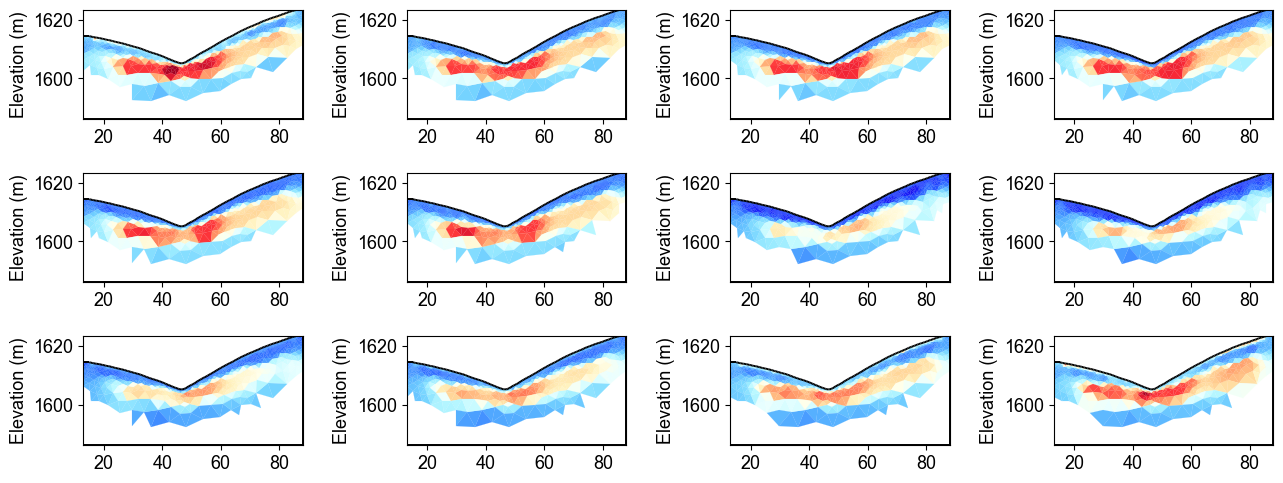

In [10]:
from palettable.lightbartlein.diverging import BlueDarkRed18_18
fixed_cmap = BlueDarkRed18_18.mpl_colormap

fig = plt.figure(figsize=[16,6])

# True resistivity model
for i in range(12):
    ax = fig.add_subplot(3,4,i+1)
    ax, cbar = pg.show(result_L1.mesh,result_L1.final_models[:,i],pad=0.3,orientation="vertical",cMap=fixed_cmap,cMin= 100,cMax = 3000
                    , ylabel="Elevation (m)",label=' Resistivity ($\Omega$ m)',ax=ax,logScale=False,coverage=result.all_coverage[i]>-1)
    cbar.remove()